# Telco Customers Churn data 

# Q: Find out the Accuracy score for the Telco Customers Churn data  data using any Machine Learning Model and perform Exploratory Data Analysis on the data

# Given features of the data:
    customerID
    gender
    SeniorCitizen
    Partner
    Dependents
    tenure
    PhoneService
    MultipleLines
    InternetService
    OnlineSecurity
    DeviceProtection
    TechSupport
    StreamingTV
    StreamingMovies
    Contract
    PaperlessBilling
    PaymentMethod
    MonthlyCharges
    TotalCharges
    Chur
    

# Tools Used:
    Pandas
    Numpy
    Matplotlib
    Seaborn
    Sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
le = LabelEncoder()
norm = MinMaxScaler()
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
data = pd.read_csv("Telco Customer Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Preparation

In [3]:
# Total no of rows and columns
data.shape

(7043, 21)

There are total 7043 records and 21 features

In [4]:
# data Column names
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Deleting columns which is not usefull for data analysis


In [5]:
data.drop(["customerID"],axis=1,inplace=True)

# Finding Whetther the dataset contains the missing Values or not?

In [6]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

__No Missing values in the datset__

In [7]:
# Checking the Data Types of the given features
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Here Total Charges are given as in the Object datatype

Covert the TotalCharges into Float type

In [8]:
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"])

ValueError: Unable to parse string " " at position 488

__We found at 488 row TotalCharges has a Empty value but we didn't find that before beacuse the Pandas read the " " as a value, because it is in Object datatype.__

Hence we are including na_values=" " while importing the dataset

In [9]:
data = pd.read_csv("Telco Customer Churn.csv",na_values=" ")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [10]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

So we have a total 11 empty values in TotalCharges.

In [11]:
# Filling the missing values with mean value in TotalCharges
data["TotalCharges"].fillna(data["TotalCharges"].mean(),inplace=True)

In [12]:
# Coverting the datatype of TotalCharges into numeric
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"])

In [13]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [14]:
data.drop(["customerID"],axis=1,inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [16]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# Exploratory Data Analysis


In [17]:
#i have divided data in 2 part fiest 'data1' for EDA process and second 'data2' for machine learning
data1 = data
data2 = data
data1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


# Q1. Total number of employee gender wise?


In [18]:
gender = data['gender'].value_counts()
gender

Male      3555
Female    3488
Name: gender, dtype: int64

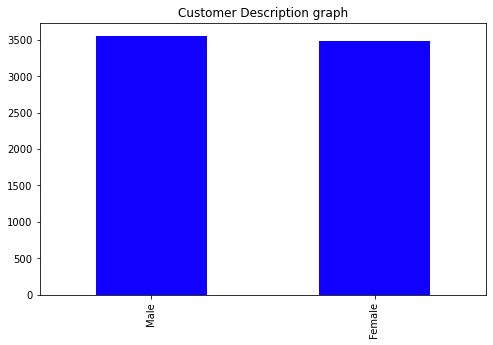

In [19]:
plt.figure(figsize=(8,5))
gender.plot.bar(color="#0F00FF")
plt.title("Customer Description graph");

# Q2. Total number of Customers who are Seniorcitizens?


In [20]:
data1["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

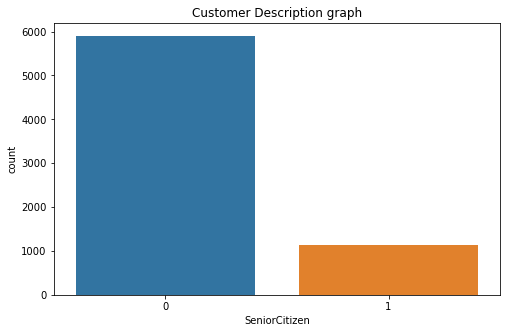

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x="SeniorCitizen",data=data1);
plt.title("Customer Description graph");

Thete are Total 1142 SeniorCtizens Customers for the Company

# Q3 Percentage of Customers who are leaving the Company?

In [22]:
data1['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

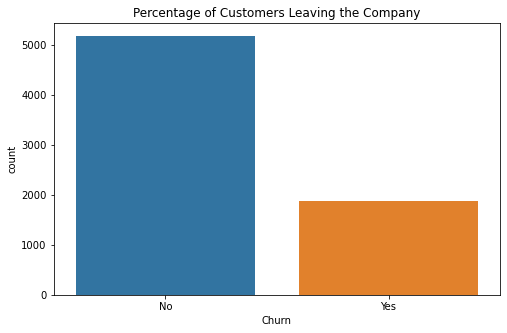

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x="Churn",data=data1);
plt.title("Percentage of Customers Leaving the Company");

Total 1869 Customers are leaving the company.

And 5174 Customers are Staying with the Company

# Q4 Percentage of Females and Males who are leaving the Company?

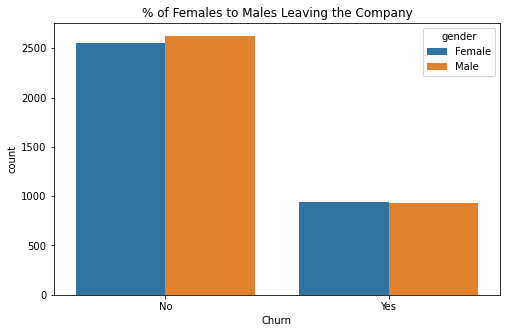

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(x="Churn",hue = "gender",data=data1);
plt.title("% of Females to Males Leaving the Company");

Almost the percentage of females to Males who are leaving are similar and 


who are staying in the company are similar.

# Different Types of InternetService

In [25]:
Ts=pd.DataFrame(data1['InternetService'].value_counts())
Ts

,InternetService
Fiber optic,3096
DSL,2421
No,1526


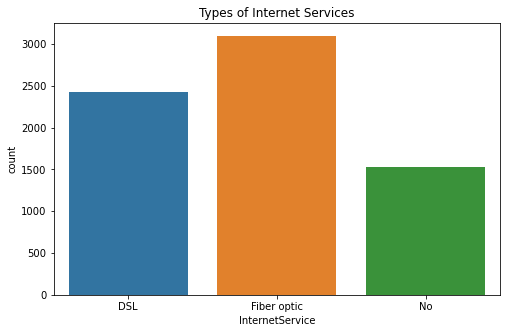

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x='InternetService',data=data1);
plt.title("Types of Internet Services");

# Q5 Find the type of InternetService which more no of Customers are leaving the Compnay?

In [27]:
IS=data1[data["Churn"]=="Yes"]["InternetService"].value_counts()
IS

Fiber optic    1297
DSL             459
No              113
Name: InternetService, dtype: int64

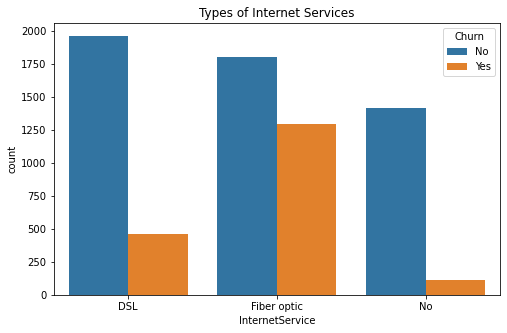

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(x='InternetService',hue= 'Churn',data=data1);
plt.title("Types of Internet Services");

Text(0.5, 1.0, 'Types of Internet Services having more churns')

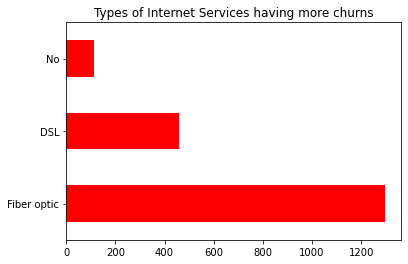

In [29]:
IS.plot.barh(color='red')
plt.title("Types of Internet Services having more churns")

The Customers who are using the Fiber Optic type of Internet Service are more likely leaving the Company.

# Types of Contract of the Customers

In [30]:
Ct = pd.DataFrame(data1["Contract"].value_counts())
Ct

,Contract
Month-to-month,3875
Two year,1695
One year,1473


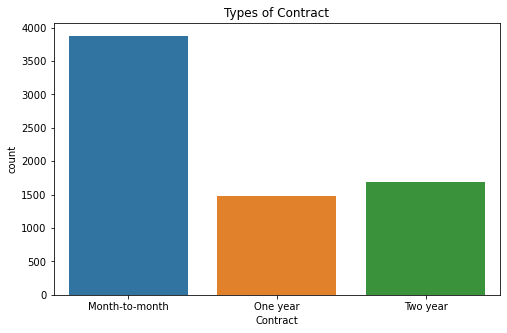

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract',data=data1);
plt.title("Types of Contract");

Month-to-Month Contarct type Customers are more for the Compnay

# Q5 Find the Contract type in which more no of Customers are leaving the Compnay?

In [32]:
Ct1 = pd.DataFrame(data1[data["Churn"]=="Yes"]["Contract"].value_counts())
Ct1

,Contract
Month-to-month,1655
One year,166
Two year,48


<AxesSubplot:>

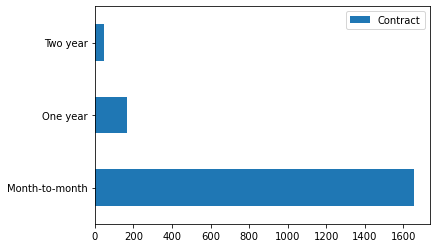

In [33]:
Ct1.plot.barh()

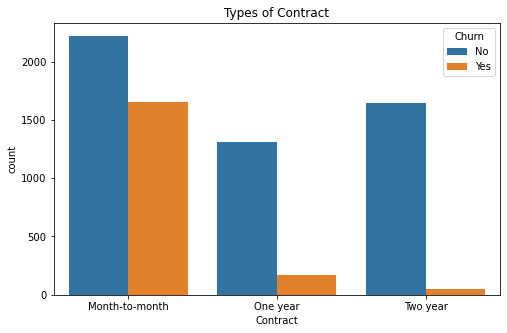

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract',hue = 'Churn',data=data1);
plt.title("Types of Contract");

Month-to-Month Customers are not Satisfied with the Company and they are the more who are leaving the Comopnay.

As Compared we can see that Two-Year Contract is the Balanced and Satisfied Contract as the Customers are very few to leave the compnay from this type.

# Applying Machine Learning

In [35]:
data2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [36]:
# Checking the datatype of the features
data2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Converting the Object data type into Numeric using Label Encoder

# Using LabelEncoder

In [37]:
le = LabelEncoder()

In [38]:
# Selecting the total Object features 
Objects = data2.select_dtypes(include= object)
Objects.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [39]:
#LabelEncoding
for i in Objects.columns:
    data2[i] = le.fit_transform(data2[i])

In [40]:
data2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


All the Columns are converted into numeric for Machine Learning

In [41]:
#Initualize the data
X = data2.drop(["Churn"],axis=1)
y = data2.Churn

# Train_Test_Split

In [42]:
# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,stratify =y, random_state=42)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(7043, 19)
(4718, 19)
(2325, 19)


__Stratify is used so that the target Churn data is spread evenly.__

# Selecting Logistic Regression Technique

In [43]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [44]:
#Fitting the Model with the data
log.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
#Predicting the data
y_pred = log.predict(X_test)

In [46]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [47]:
np.array(y_test)

array([1, 0, 0, ..., 0, 0, 1])

In [48]:
# Accuracy Score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))
print("Accuracy Score = ", accuracy_score(y_test,y_pred)*100)

0.7935483870967742
Accuracy Score =  79.35483870967742


__We got an Accuracy of 79% from the model.__

In [49]:
pd.crosstab(y_test,y_pred)

col_0,0,1
Churn,,
0,1497,211
1,269,348


<AxesSubplot:xlabel='col_0', ylabel='Churn'>

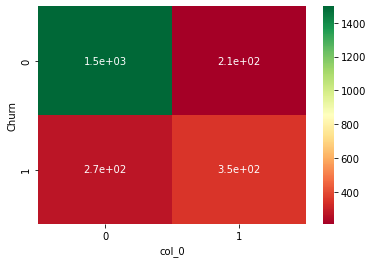

In [50]:
sns.heatmap(pd.crosstab(y_test,y_pred),annot=True,cmap="RdYlGn")

To incrase the accuracy we can remove the features having  low coeficients in LogisticRegression

In [51]:
#Coefficients
log.coef_

array([[-0.05029942,  0.12901113, -0.06556615, -0.17369987, -0.07184007,
        -0.20151855,  0.15945463, -0.07286359, -0.39937973, -0.20217679,
        -0.14166442, -0.40555233,  0.01370491,  0.05782021, -0.41084371,
         0.19331472,  0.04702871,  0.0135747 ,  0.00047021]])

In [52]:
# Features and their Coefficients
CF1= pd.DataFrame({"Features": X.columns})
CF2= pd.DataFrame( log.coef_.T,columns=["coef"])
CF = pd.concat([CF1,CF2],axis=1)
CF = CF.sort_values("coef",ascending=False)
CF

,Features,coef
15,PaperlessBilling,0.193315
6,MultipleLines,0.159455
1,SeniorCitizen,0.129011
13,StreamingMovies,0.057820
16,PaymentMethod,0.047029
12,StreamingTV,0.013705
17,MonthlyCharges,0.013575
18,TotalCharges,0.000470
0,gender,-0.050299
2,Partner,-0.065566


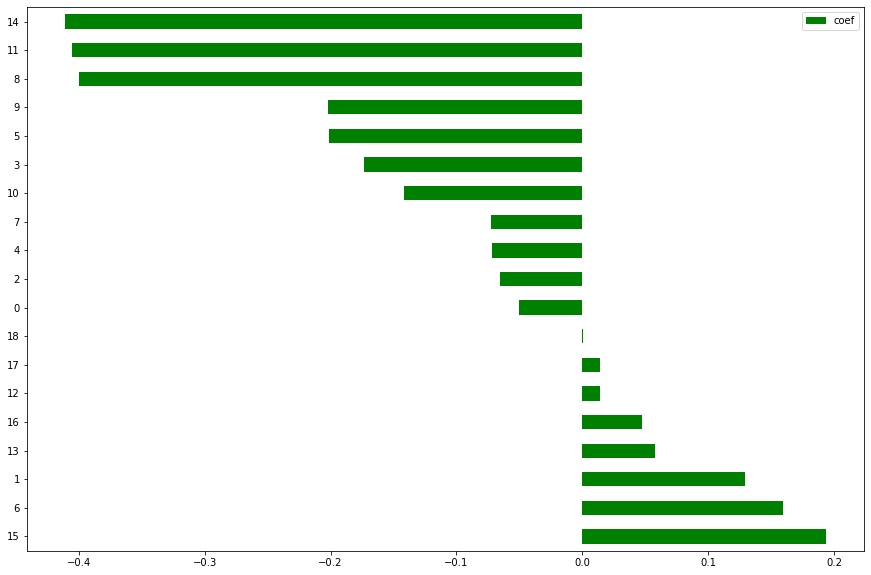

In [53]:
CF.plot.barh(figsize=(15,10), color="green");

In [54]:
# Taking the top 10 important features
top=CF["Features"][:11]
top

15    PaperlessBilling
6        MultipleLines
1        SeniorCitizen
13     StreamingMovies
16       PaymentMethod
12         StreamingTV
17      MonthlyCharges
18        TotalCharges
0               gender
2              Partner
4               tenure
Name: Features, dtype: object

In [55]:
X_train1 = X_train[top]
X_test1 = X_test[top]

In [56]:
LG = LogisticRegression()

In [57]:
LG.fit(X_train1,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [58]:
y_preds = LG.predict(X_test1)

In [59]:
y_preds

array([0, 0, 0, ..., 0, 0, 1])

In [60]:
np.array(y_test)

array([1, 0, 0, ..., 0, 0, 1])

In [61]:
print("Accuracy score is = ",round(accuracy_score(y_preds,y_test),2)*100,"%")

Accuracy score is =  78.0 %


# The Accuracy Score for the TeleChurns data is 78%